총 데이터 개수: 2161
클래스(감정) 종류: ['labels', '기쁨', '당황', '분노', '불안', '상처', '슬픔', '중립']
클래스-인덱스 맵: {'labels': 0, '기쁨': 1, '당황': 2, '분노': 3, '불안': 4, '상처': 5, '슬픔': 6, '중립': 7}

Images batch shape: torch.Size([8, 3, 224, 224])
Labels batch shape: torch.Size([8])
Labels batch: tensor([1, 1, 4, 2, 2, 5, 6, 6])


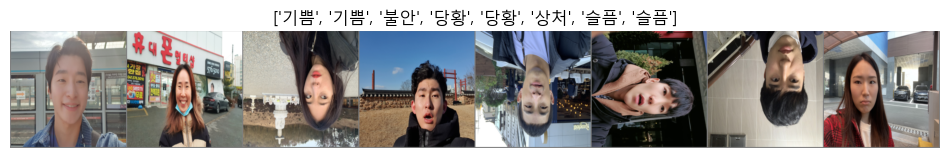

In [4]:
import torch
from torch.utils.data import DataLoader
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision
import numpy as np
from core.data.dataset import EmotionDataset

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 1% 샘플링 데이터가 저장된 경로를 지정합니다.
#    이전에 run_sampling.py를 실행하여 생성된 폴더입니다.
data_dir = Path("./datasets/korean_emotion_complex_vision_1_percent")

# 3. 데이터셋 객체를 생성합니다.
emotion_dataset = EmotionDataset(data_dir=data_dir)
print(f"총 데이터 개수: {len(emotion_dataset)}")
print(f"클래스(감정) 종류: {emotion_dataset.classes}")
print(f"클래스-인덱스 맵: {emotion_dataset.class_to_idx}")

# 4. DataLoader 객체를 생성합니다.
#    - batch_size: 한 번에 8개의 데이터를 묶어서 전달
#    - shuffle: 매 epoch마다 데이터 순서를 섞음 (과적합 방지)
emotion_dataloader = DataLoader(emotion_dataset, batch_size=8, shuffle=True)

# 5. DataLoader에서 데이터 한 배치를 꺼내봅니다.
images, labels = next(iter(emotion_dataloader))

# 6. 가져온 배치의 형태(shape)와 내용을 확인합니다.
print(f"\nImages batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Labels batch: {labels}")

# 7. (시각화) 이미지 배치를 그리드로 만들어 출력합니다.
#    이미지 정규화를 [-1, 1] 범위로 했으므로, 시각화를 위해 다시 [0, 1] 범위로 되돌립니다.
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# 이미지 그리드 생성
out = torchvision.utils.make_grid(images)
# 숫자 라벨을 다시 감정 이름으로 변환
title = [emotion_dataset.classes[x] for x in labels]
plt.figure(figsize=(12, 6))
plt.axis('off')
imshow(out, title=title)